# Project 2
### Supermart Grocery Sales

## Import necessary libraries

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import numpy as np


## Load datasets

In [4]:
# Replace 'supermart_grocery_sales.csv' with your dataset file path
data = pd.read_csv('supermart_grocery_sales.csv',encoding='latin1')


## Inspect datasets

In [30]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ï»¿Order ID       9994 non-null   object        
 1   Customer Name     9994 non-null   object        
 2   Category          9994 non-null   int32         
 3   Sub Category      9994 non-null   int32         
 4   City              9994 non-null   int32         
 5   Order Date        9994 non-null   datetime64[ns]
 6   Region            9994 non-null   int32         
 7   Sales             9994 non-null   int64         
 8   Discount          9994 non-null   float64       
 9   Profit            9994 non-null   float64       
 10  State             9994 non-null   int32         
 11  Order Day         9994 non-null   int64         
 12  Order Month       9994 non-null   int64         
 13  Order Year        9994 non-null   int64         
 14  Order Month-Year  9994 n

In [31]:
print(data.describe())


          Category  Sub Category         City       Region        Sales  \
count  9994.000000   9994.000000  9994.000000  9994.000000  9994.000000   
mean      3.015309     11.090855    11.429258     2.053132  1496.596158   
std       2.008006      6.677107     6.931600     1.629766   577.559036   
min       0.000000      0.000000     0.000000     0.000000   500.000000   
25%       1.000000      5.000000     6.000000     1.000000  1000.000000   
50%       3.000000     11.000000    11.000000     1.000000  1498.000000   
75%       5.000000     17.000000    17.000000     4.000000  1994.750000   
max       6.000000     22.000000    23.000000     4.000000  2500.000000   

          Discount       Profit   State    Order Day  Order Month  \
count  9994.000000  9994.000000  9994.0  9994.000000  9994.000000   
mean      0.226817   374.937082     0.0    15.468381     7.809686   
std       0.074636   239.932881     0.0     8.748178     3.284654   
min       0.100000    25.250000     0.0     1.00

In [5]:
print(data.head())


  ï»¿Order ID Customer Name          Category      Sub Category         City  \
0         OD1        Harish      Oil & Masala           Masalas      Vellore   
1         OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


## Missing Values

In [6]:
# Handle missing values
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract features from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Category', 'Sub Category', 'City', 'Region', 'State']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ï»¿Order ID    9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   int32         
 3   Sub Category   9994 non-null   int32         
 4   City           9994 non-null   int32         
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   int32         
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   int32         
 11  Order Day      9994 non-null   int64         
 12  Order Month    9994 non-null   int64         
 13  Order Year     9994 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(5), int64(4), object(2)
memory u

## Visualization

### Sales by Category

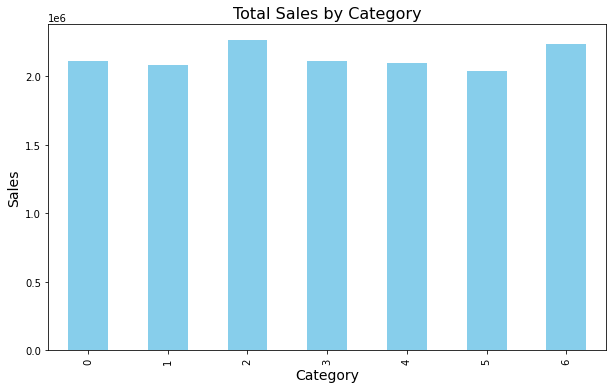

In [7]:

sales_by_category = data.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()


### Sales Trends Over Time

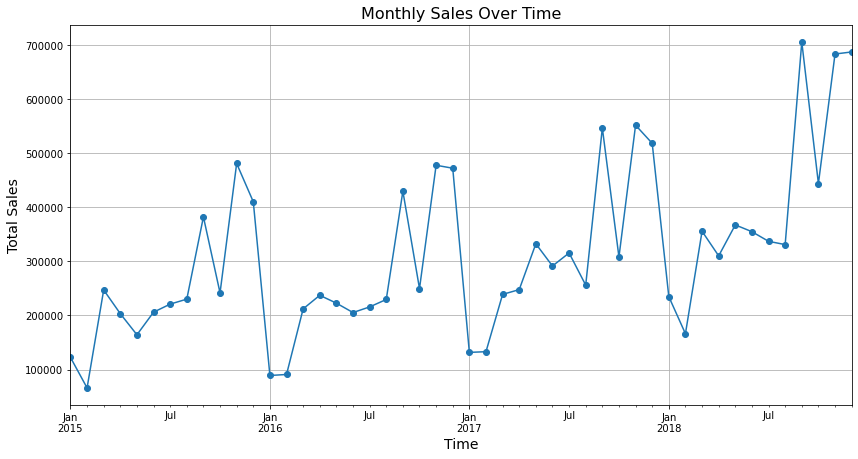

In [8]:


data['Order Month-Year'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Order Month-Year')['Sales'].sum()
monthly_sales.plot(figsize=(14, 7), marker='o')
plt.title('Monthly Sales Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True)
plt.show()


### Correlation Heatmap

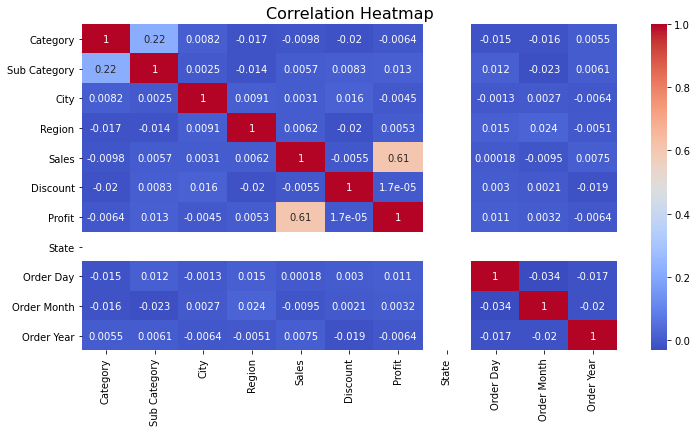

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



## Feature Engineering


In [10]:
# Select features and target variable
target = data['Sales']

# Drop columns that don't exist
columns_to_drop = ['Order ID', 'Customer Name', 'Order Date', 'Order Month-Year']
existing_columns = [col for col in columns_to_drop if col in data.columns]
features = data.drop(columns=existing_columns + ['Sales'])

# Handle missing values
features = features.fillna(0)

# Convert columns to numeric
for col in features.columns:
    features[col] = pd.to_numeric(features[col], errors='coerce')

# Ensure features and target are of correct data type
features = features.astype(float)
target = target.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


## Model Building


In [23]:

# Replace NaN values with 0 (or any other suitable value)
X_train = np.nan_to_num(X_train, nan=0)
X_test = np.nan_to_num(X_test, nan=0)
y_train = np.nan_to_num(y_train, nan=0)
y_test = np.nan_to_num(y_test, nan=0)

# Replace infinity values with a large finite number
X_train = np.where(np.isinf(X_train), 1e10, X_train)
X_test = np.where(np.isinf(X_test), 1e10, X_test)
y_train = np.where(np.isinf(y_train), 1e10, y_train)
y_test = np.where(np.isinf(y_test), 1e10, y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)






## Model Evaluation

In [24]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 212954.08
R-squared: 0.35


## Visualization

### Actual vs Predicted Sales


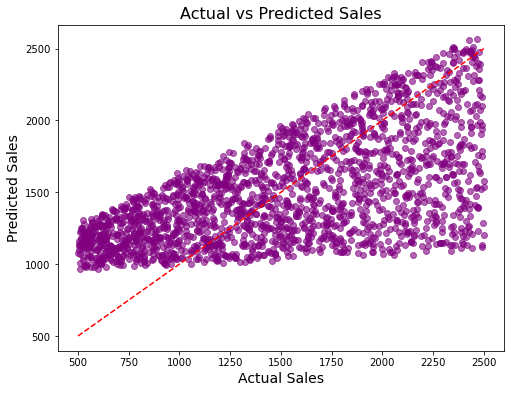

In [25]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.show()


### Feature Importance using Decision Trees

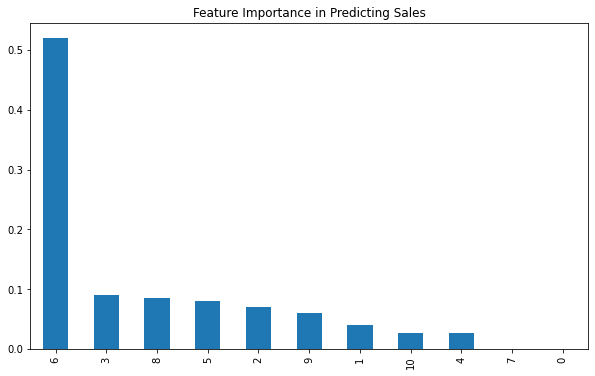

In [27]:

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
feature_importances = pd.Series(tree_model.feature_importances_)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Predicting Sales')
plt.show()


### Top 5 Cities by Sales


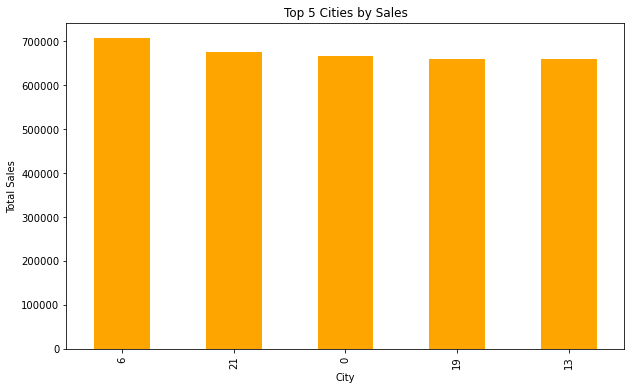

In [15]:
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
city_sales.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()


### Outlier Detection and Handling

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


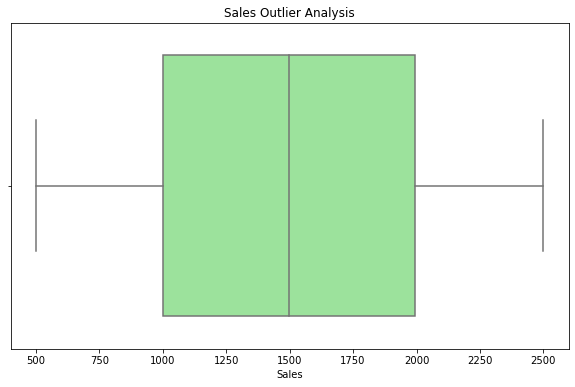

In [16]:

plt.figure(figsize=(10, 6))
sns.boxplot(data['Sales'], color='lightgreen')
plt.title('Sales Outlier Analysis')
plt.show()


### Clustering Analysis

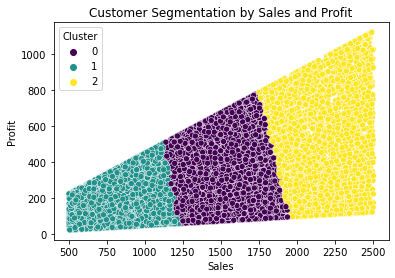

In [17]:

clustering_data = data[['Sales', 'Profit']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_data)
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation by Sales and Profit')
plt.show()


### Feature Importance using Decision Trees

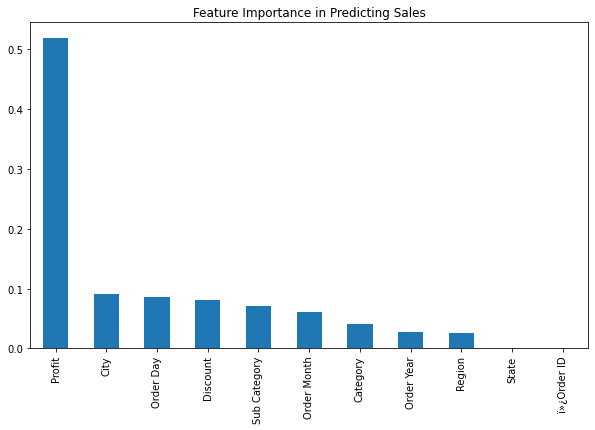

In [28]:

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
feature_importances = pd.Series(tree_model.feature_importances_, index=features.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Predicting Sales')
plt.show()
